<a href="https://colab.research.google.com/github/isabelpbrasil/Limpeza-dos-dados-e-analise-exploratoria_RHdataset/blob/main/Limpeza_dos_Dados_e_An%C3%A1lise_Explorat%C3%B3ria_RH_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bootcamp (Re)Start - Data Girls

Trabalho final - Trilha Analista de dados

Aluna: Isabel Pacheco Brasil de Matos

# Importar dados

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados

df = pd.read_csv('https://drive.google.com/uc?export=download&id=1L8Gi-Bgd9022lmBTxFoJN1b17zErmuho')

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Identificar a quantidade de dados (linhas e colunas)

print(df.shape)

(1470, 35)


In [ ]:
# Quais colunas estão presentes na tabela

print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


# Verificar quantidade de valores ausentes

In [ ]:
# Verificar nulos

print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Conclusão: Não há valores nulos.

# Verificar o formato dos dados

In [ ]:
# Visão geral dos dados

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Verificar se há valores duplicados

In [ ]:
df[df.EmployeeNumber.duplicated(keep=False)].sort_values(by='EmployeeNumber')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


Conclusão: Não há valores duplicados.

# Verificar se há outliers

In [ ]:
df_numericos = df.select_dtypes(include="number") #cria um novo DataFrame chamado df_numericos contendo somente as colunas com dados do tipo numérico
df_numericos.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df_numericos.describe() #análise estatística descritiva das colunas numéricas do DataFrame df_numericos

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<Axes: xlabel='MonthlyIncome'>

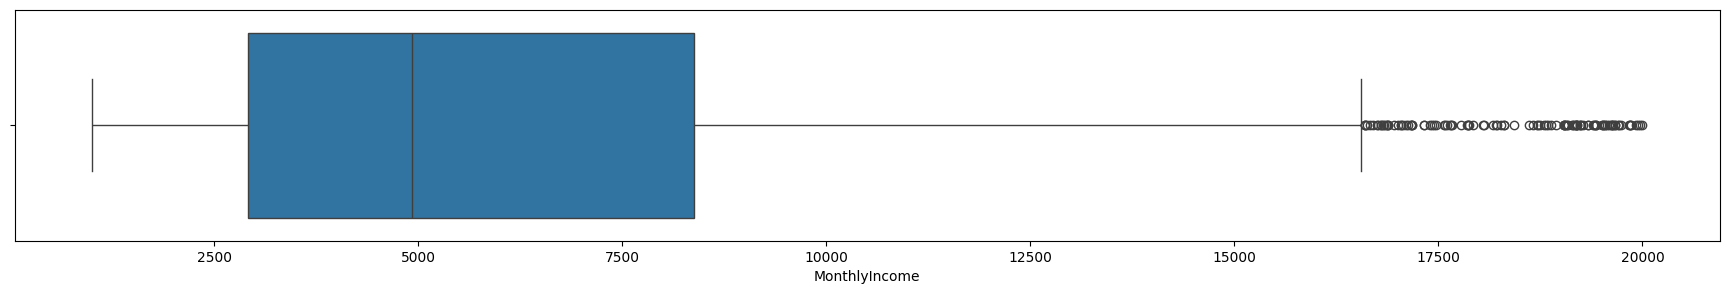

In [ ]:
plt.rcParams["figure.figsize"] = (22, 3)
sns.boxplot(x=df['MonthlyIncome'])

<Axes: xlabel='NumCompaniesWorked'>

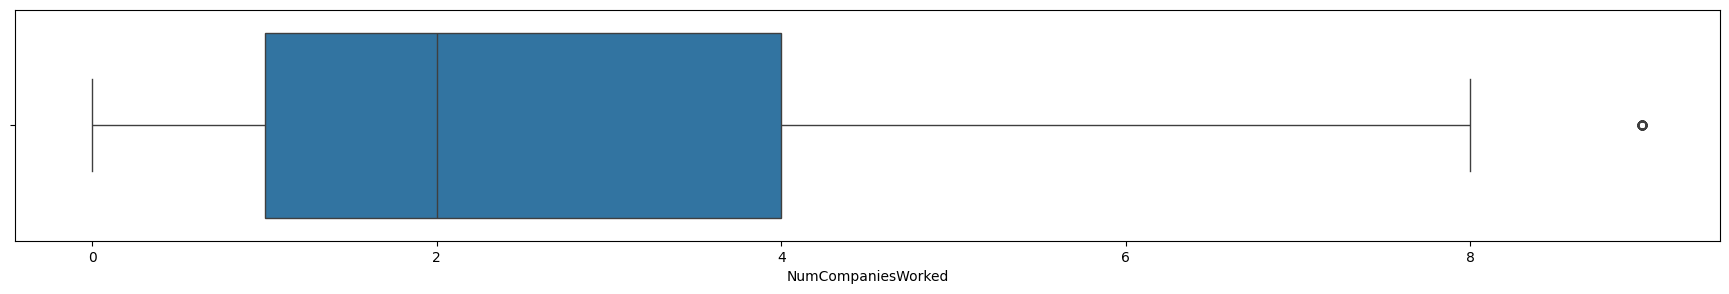

In [ ]:
plt.rcParams["figure.figsize"] = (22, 3)
sns.boxplot(x=df['NumCompaniesWorked'])

<Axes: xlabel='YearsAtCompany'>

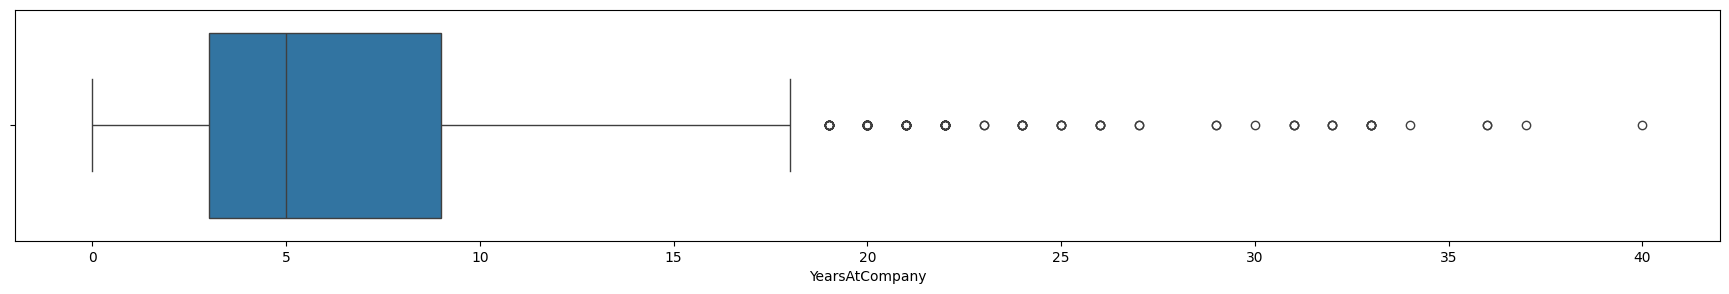

In [ ]:
plt.rcParams["figure.figsize"] = (22, 3)
sns.boxplot(x=df['YearsAtCompany'])

<Axes: xlabel='YearsInCurrentRole'>

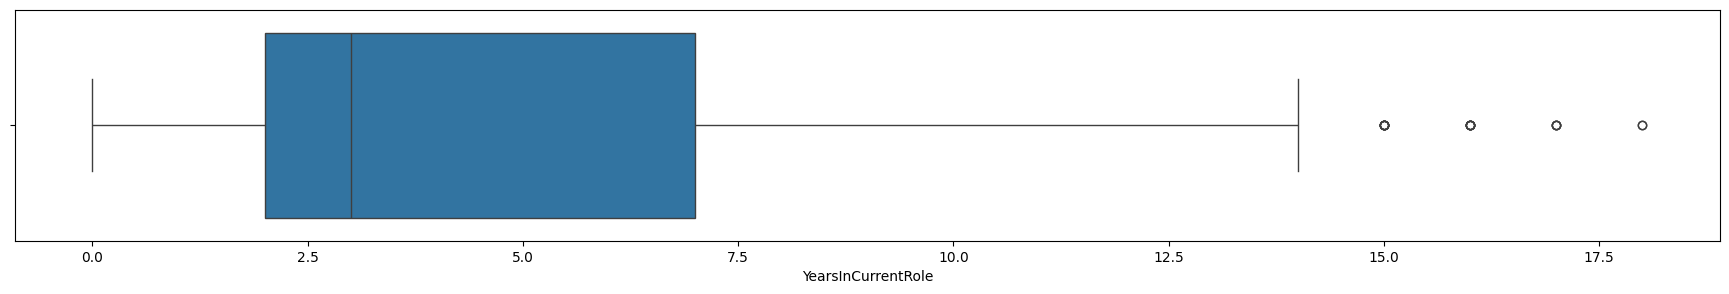

In [ ]:
plt.rcParams["figure.figsize"] = (22, 3)
sns.boxplot(x=df['YearsInCurrentRole'])

<Axes: xlabel='YearsSinceLastPromotion'>

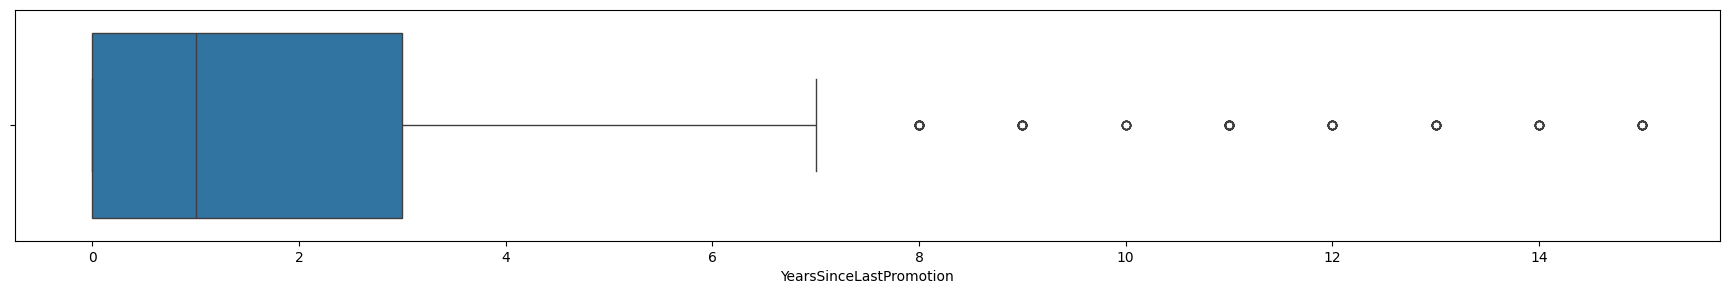

In [ ]:
plt.rcParams["figure.figsize"] = (22, 3)
sns.boxplot(x=df['YearsSinceLastPromotion'])

<Axes: xlabel='YearsWithCurrManager'>

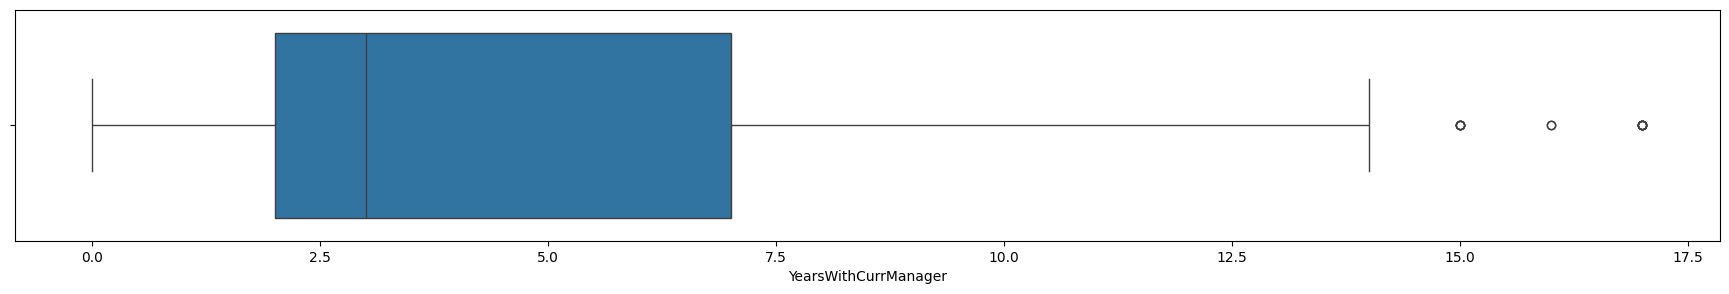

In [ ]:
plt.rcParams["figure.figsize"] = (22, 3)
sns.boxplot(x=df['YearsWithCurrManager'])

Os valores de ouliers encontrados são variações esperadas dentro do contexto analisado.

# Análise exploratória

In [ ]:
# Análise estatística básica

with pd.option_context("float_format","{:.2f}".format):
  display(df.describe())

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [ ]:
# Quantidade de valores de cada coluna (junta os que são iguais)

print(df.nunique())

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

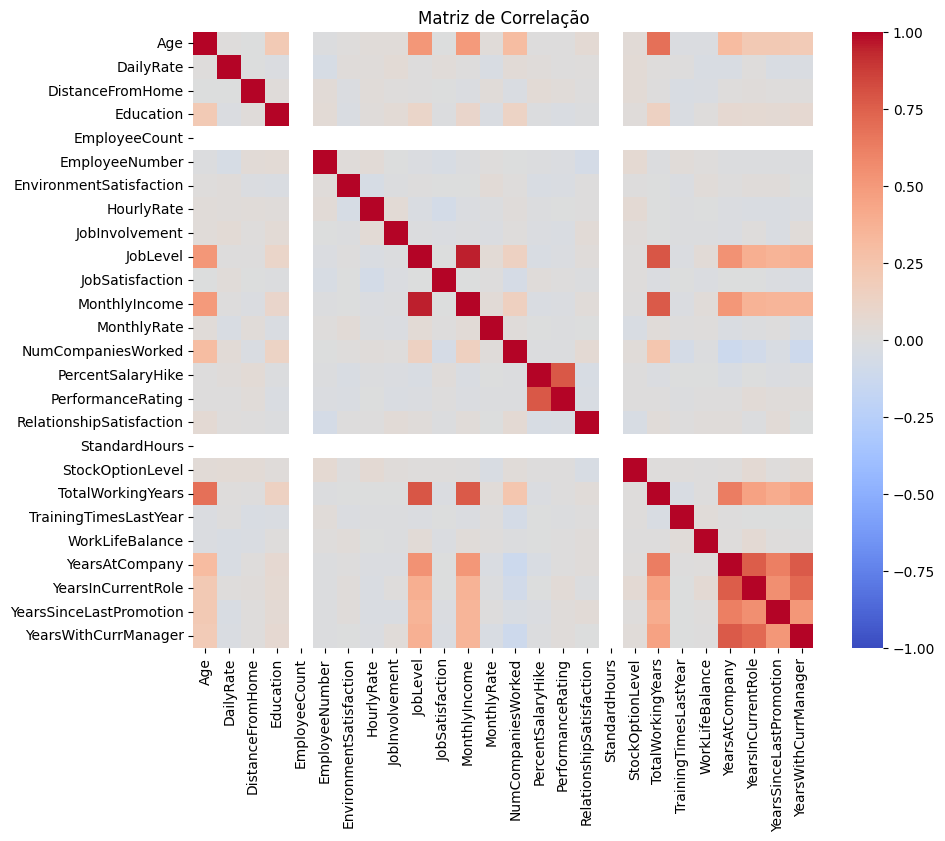

In [ ]:
# Matriz de correlação

df_numerico = df.select_dtypes(include='number')
correlacoes = df_numerico.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes, cmap='coolwarm', vmin=-1, vmax=1, annot=False)
plt.title('Matriz de Correlação')
plt.show()

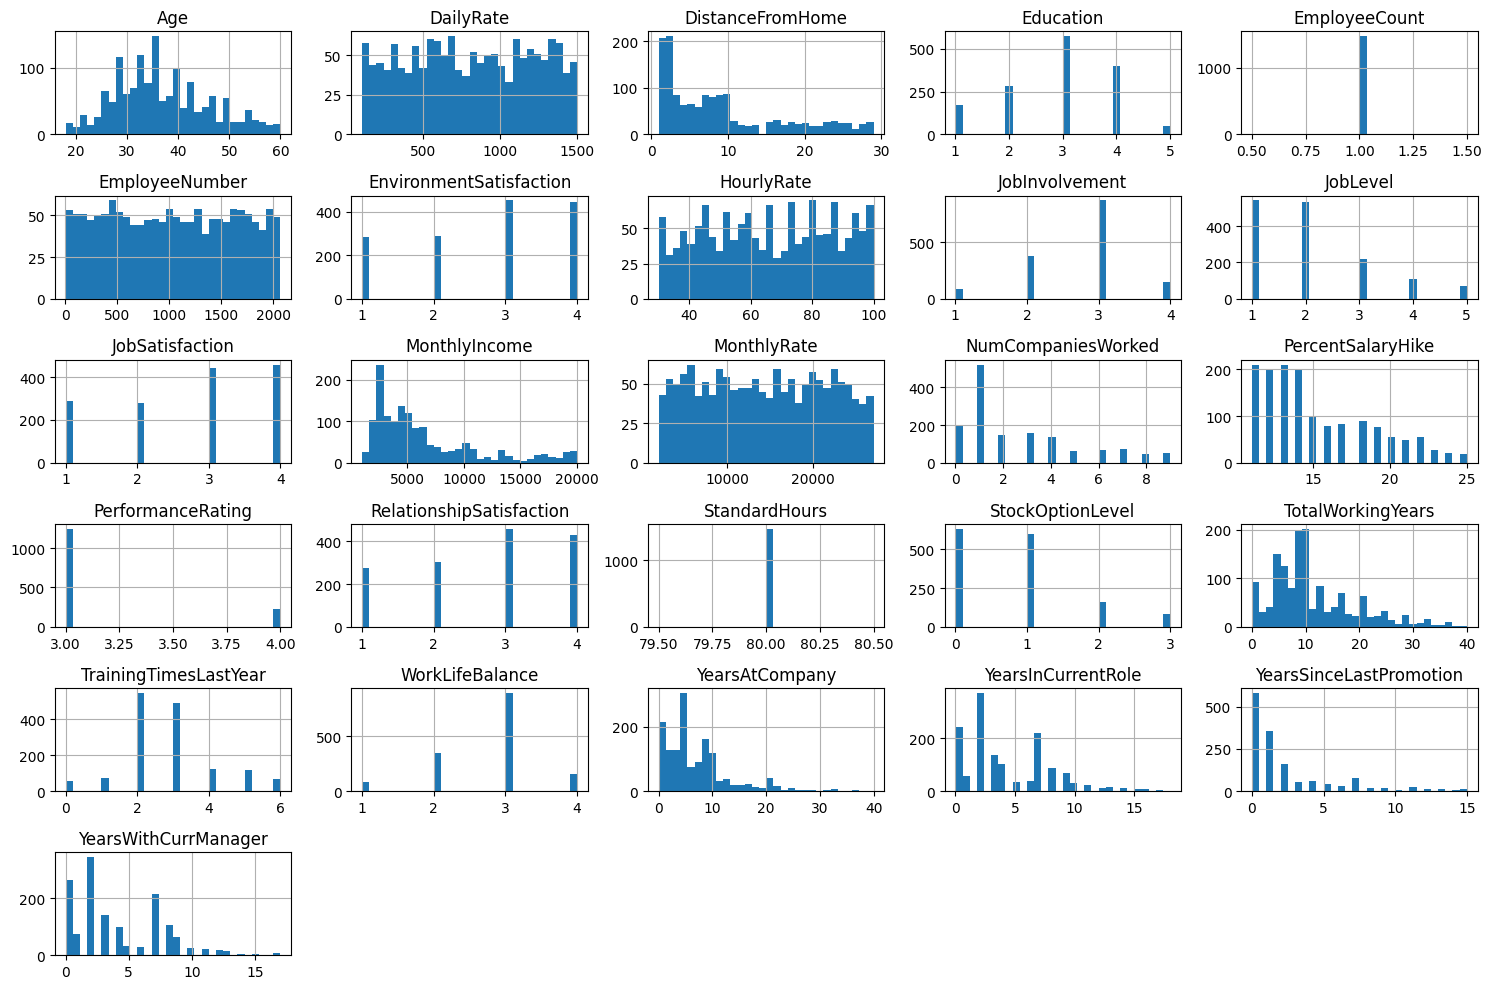

In [ ]:
# Histograma para variáveis numéricas

df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

Perguntas: 1. Qual perfil tem maior risco de rotatividade? 2. Quais fatores mais influenciam na decisão de sair?

Relação entre Rotatividade (Attrition) e algumas variáveis:

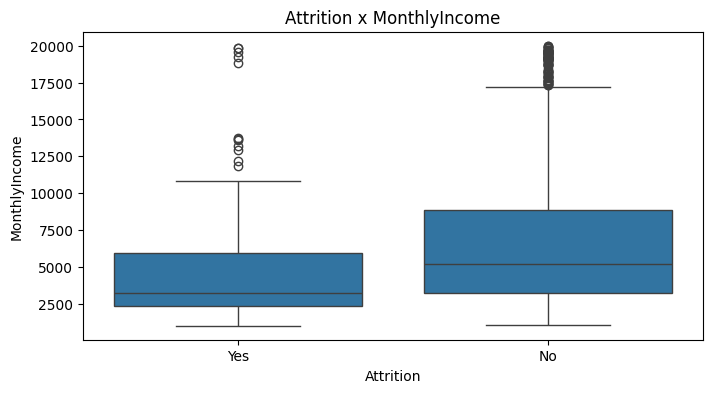

In [ ]:
# Distribuição de MonthlyIncome por Attrition

plt.figure(figsize=(8,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Attrition x MonthlyIncome')
plt.show()

*   A mediana de MonthlyIncome é mais baixa para quem saiu (Yes) do que para quem ficou (No). Isso sugere que funcionários com menor salário têm mais chance de sair.
*   A maior parte dos que saíram ganha até ~5.000. Já quem ficou tem uma caixinha mais alta — muitos ganham entre ~3.000 e ~9.000.
*   Existem pessoas que saíram mesmo com salários muito altos (>15.000), mas são poucos (pontos acima do bigode). O mesmo ocorre com quem permaneceu.
*   Os salários de quem ficou variam muito mais. O grupo que saiu tem uma faixa salarial mais concentrada.





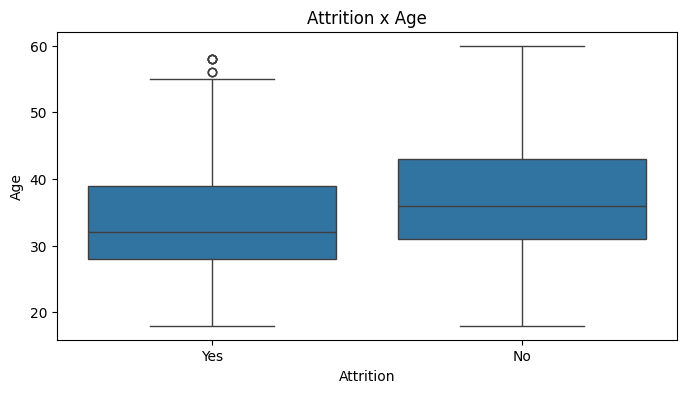

In [ ]:
# Distribuição de Age por Attrition

plt.figure(figsize=(8,4))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Attrition x Age')
plt.show()

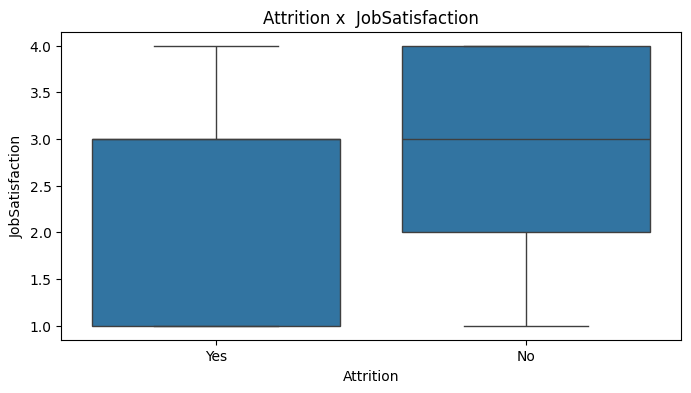

In [ ]:
# Distribuição de JobSatisfaction por Attrition

plt.figure(figsize=(8,4))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Attrition x  JobSatisfaction')
plt.show()

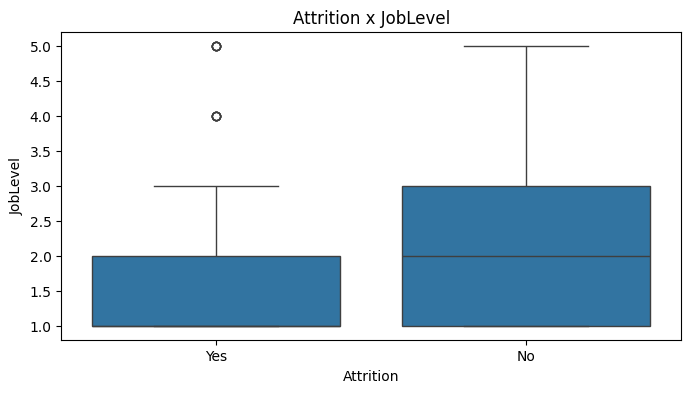

In [ ]:
# Distribuição de JobLevel por Attrition

plt.figure(figsize=(8,4))
sns.boxplot(x='Attrition', y='JobLevel', data=df)
plt.title('Attrition x JobLevel')
plt.show()

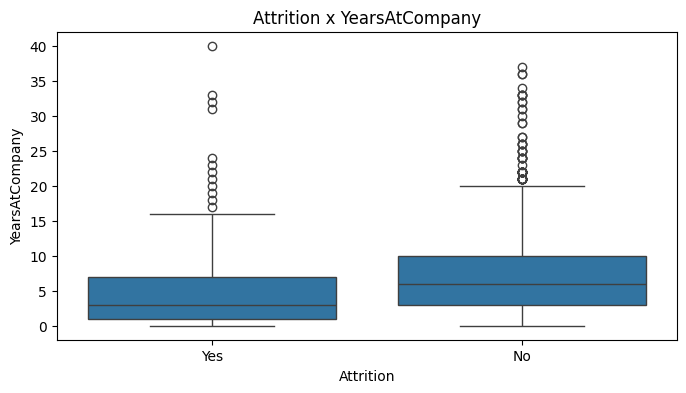

In [ ]:
# Distribuição de YearsAtCompany por Attrition

plt.figure(figsize=(8,4))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Attrition x YearsAtCompany')
plt.show()

Pergunta: 3. Qual departamento/cargo merece atenção imediata?

Objetivo: Descobrir os cargos ou departamentos com maior taxa de rotatividade.

In [ ]:
# Criar coluna binária
df['AttritionBinary'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Agrupar e ordenar
df.groupby('Department')['AttritionBinary'].mean().sort_values(ascending=False)
df.groupby('JobRole')['AttritionBinary'].mean().sort_values(ascending=False)


,AttritionBinary
JobRole,
Sales Representative,0.397590
Laboratory Technician,0.239382
Human Resources,0.230769
Sales Executive,0.174847
Research Scientist,0.160959
Manufacturing Director,0.068966
Healthcare Representative,0.068702
Manager,0.049020
Research Director,0.025000


/tmp/ipython-input-3938395260.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_attrition, x='AttritionBinary', y='Department', palette='Reds_r')


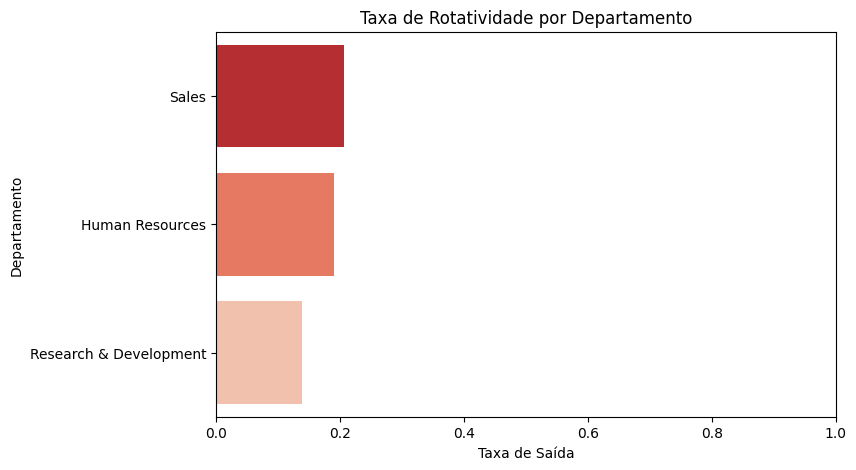

In [ ]:
# Taxa média de saída por departamento
dept_attrition = df.groupby('Department')['AttritionBinary'].mean().sort_values(ascending=False).reset_index()

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=dept_attrition, x='AttritionBinary', y='Department', palette='Reds_r')
plt.title('Taxa de Rotatividade por Departamento')
plt.xlabel('Taxa de Saída')
plt.ylabel('Departamento')
plt.xlim(0, 1)
plt.show()

/tmp/ipython-input-2528945946.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=role_attrition, x='AttritionBinary', y='JobRole', palette='Blues_r')


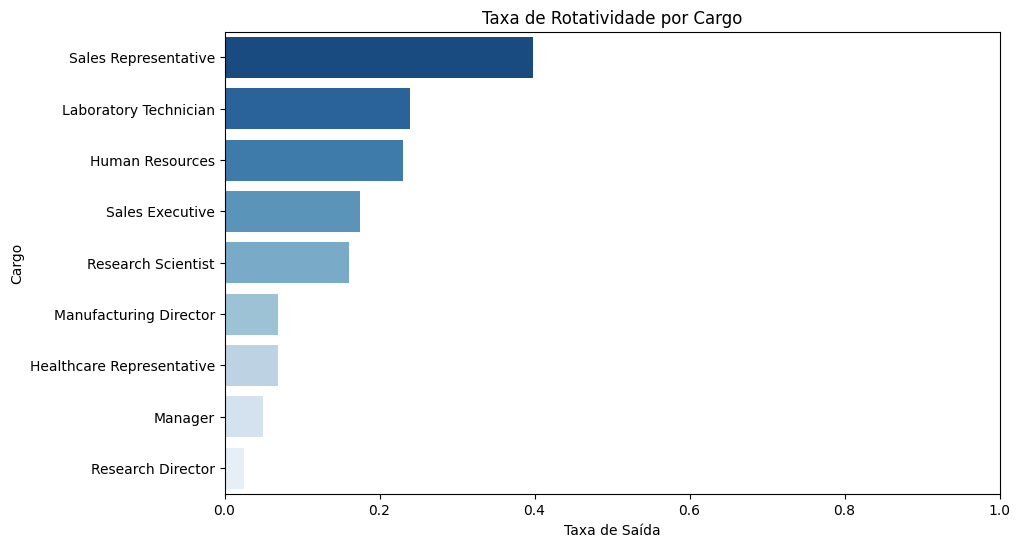

In [ ]:
# Taxa média de saída por cargo
role_attrition = df.groupby('JobRole')['AttritionBinary'].mean().sort_values(ascending=False).reset_index()

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=role_attrition, x='AttritionBinary', y='JobRole', palette='Blues_r')
plt.title('Taxa de Rotatividade por Cargo')
plt.xlabel('Taxa de Saída')
plt.ylabel('Cargo')
plt.xlim(0, 1)
plt.show()


Pergunta: 4. Há padrão na duração do tempo de casa antes da saída?

Objetivo: Saber se existe um "ponto crítico" em que as pessoas tendem a sair.

<Axes: >

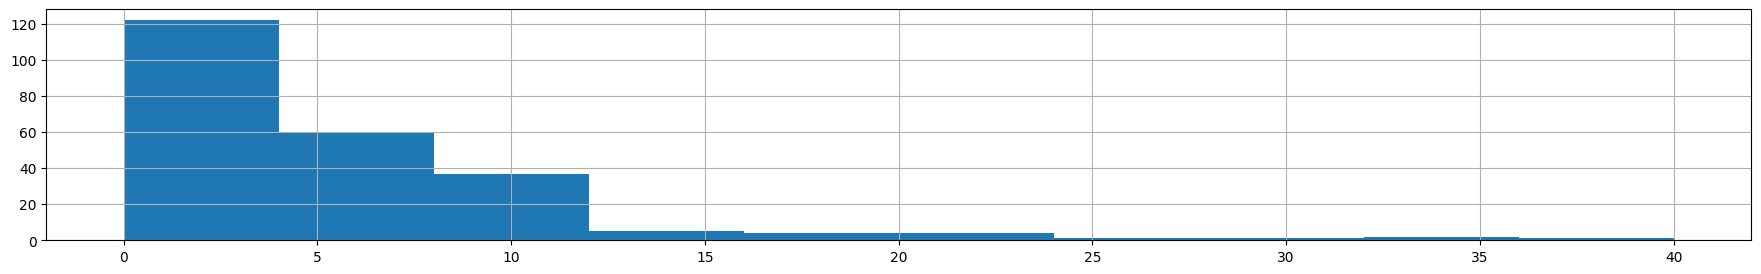

In [ ]:
df[df['Attrition'] == 'Yes']['YearsAtCompany'].hist(bins=10)

A maior parte das saídas ocorre nos primeiros 3 a 5 anos. Esse período pode ser considerado um ponto crítico onde os colaboradores estão mais propensos a sair da empresa. Poucas pessoas saem com mais de 10 anos de casa.

Perfil dos funcionários

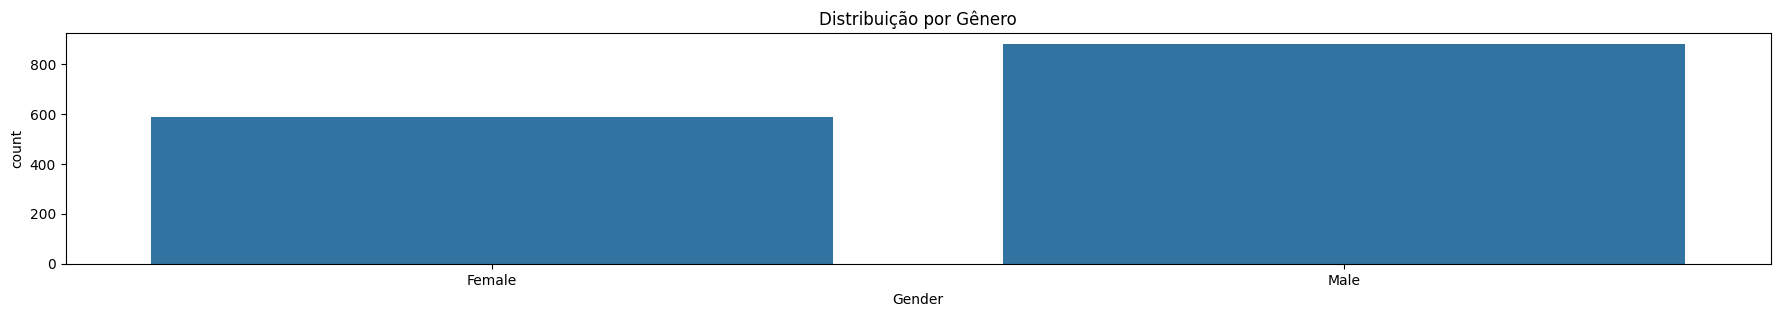

In [ ]:
# Entender a diversidade de gênero na empresa.

sns.countplot(x='Gender', data=df)
plt.title('Distribuição por Gênero')
plt.show()

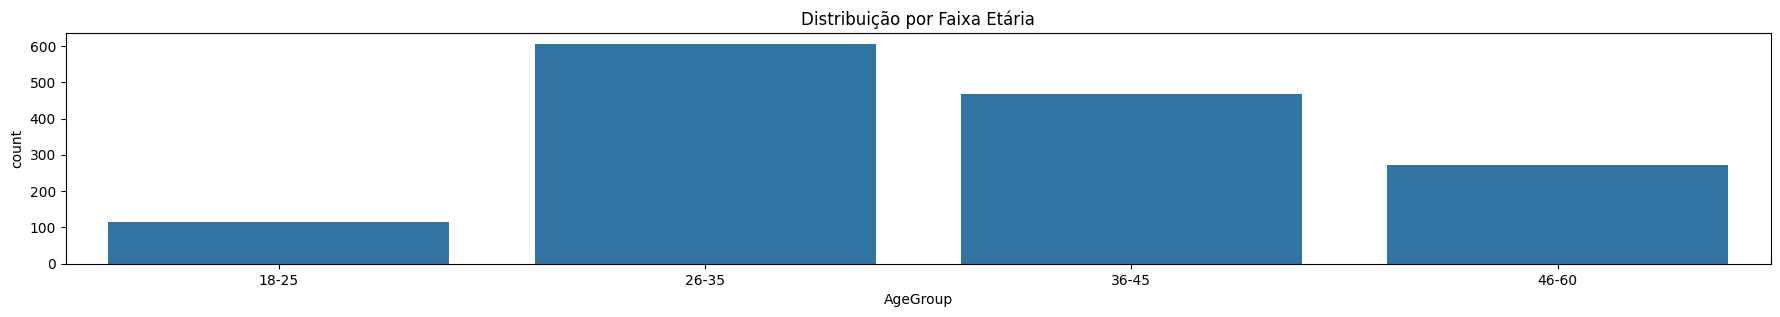

In [ ]:
# Entender o perfil etário da empresa.

df['AgeGroup'] = pd.cut(df['Age'], bins=[18,25,35,45,60], labels=['18-25','26-35','36-45','46-60'])
sns.countplot(x='AgeGroup', data=df)
plt.title('Distribuição por Faixa Etária')
plt.show()

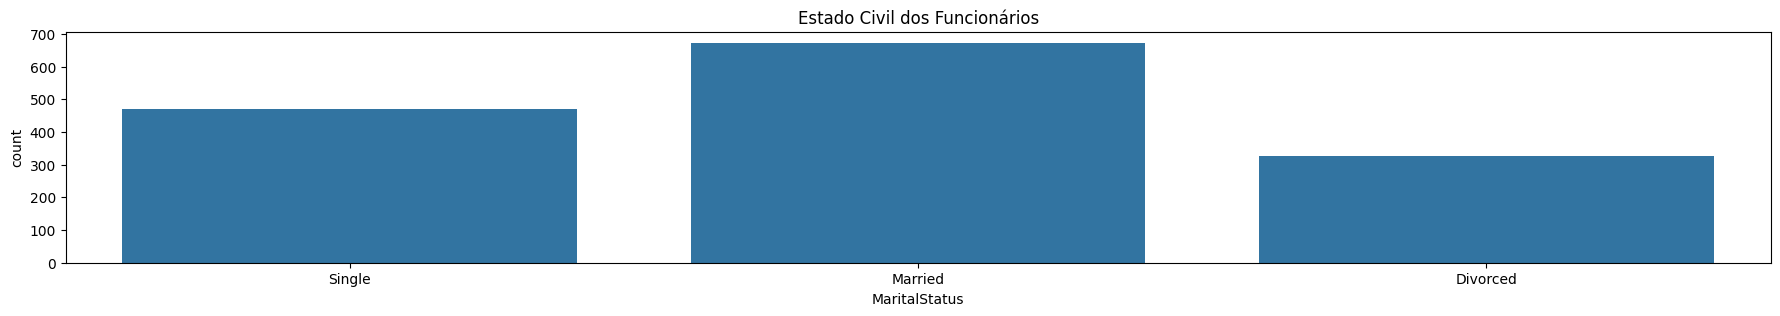

In [ ]:
# Entender o perfil social dos funcionários.

sns.countplot(x='MaritalStatus', data=df)
plt.title('Estado Civil dos Funcionários')
plt.show()

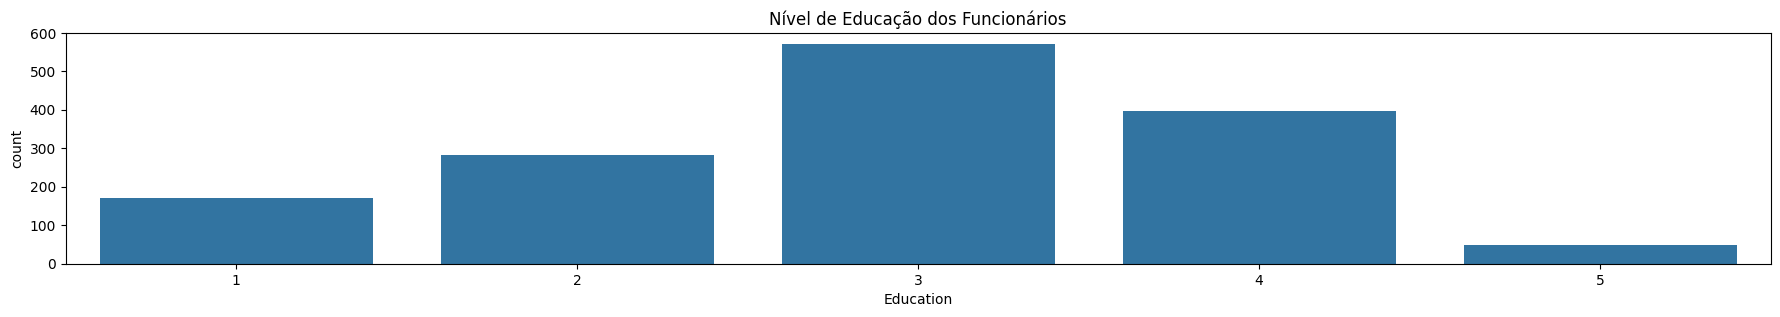

In [ ]:
# Entender o nível de educação dos funcionários.

sns.countplot(x='Education', data=df)
plt.title('Nível de Educação dos Funcionários')
plt.show()

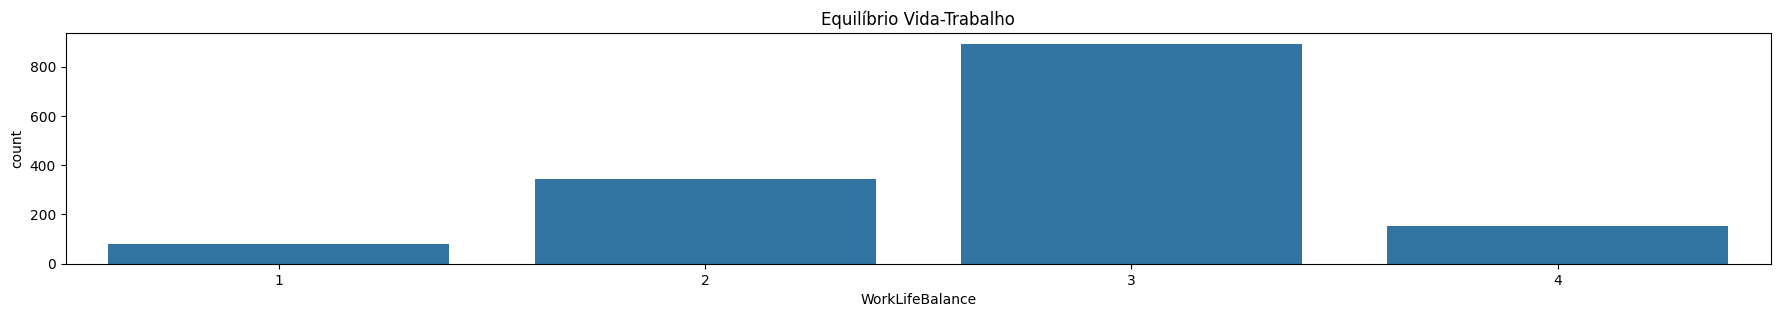

In [ ]:
# Entender se a empresa está conseguindo oferecer equilíbrio.

sns.countplot(x='WorkLifeBalance', data=df)
plt.title('Equilíbrio Vida-Trabalho')
plt.show()

Perfil do ambiente de trabalho

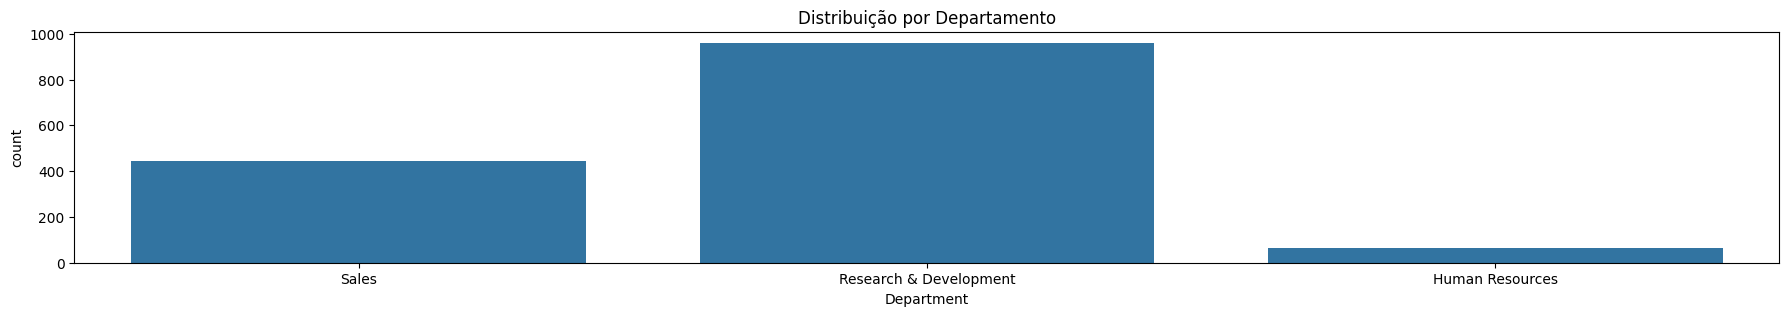

In [ ]:
# Qual departamento é maior e concentrada a força de trabalho?

sns.countplot(x='Department', data=df)
plt.title('Distribuição por Departamento')
plt.show()

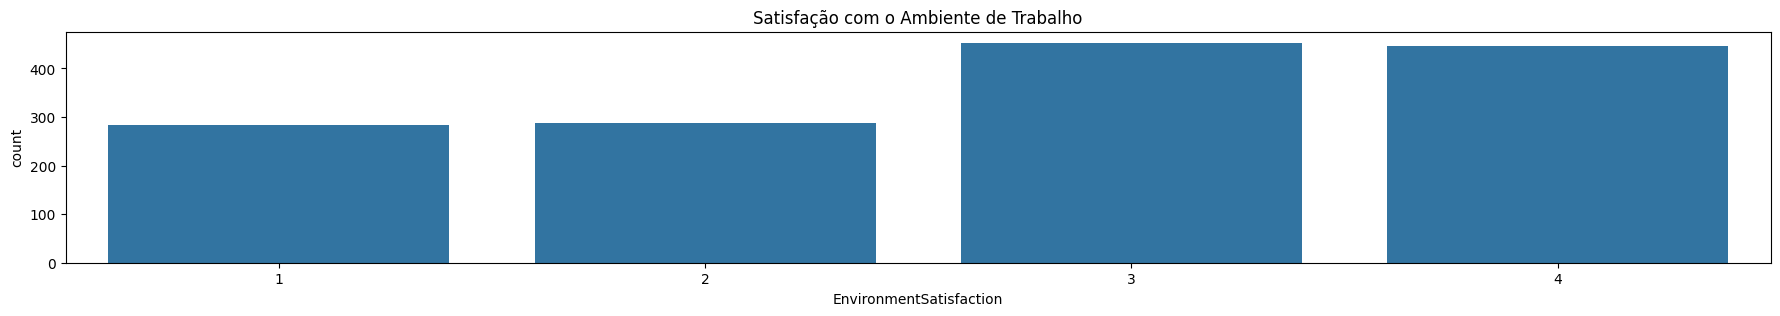

In [ ]:
# Entender a satisfação com o ambiente de trabalho.

sns.countplot(x='EnvironmentSatisfaction', data=df)
plt.title('Satisfação com o Ambiente de Trabalho')
plt.show()

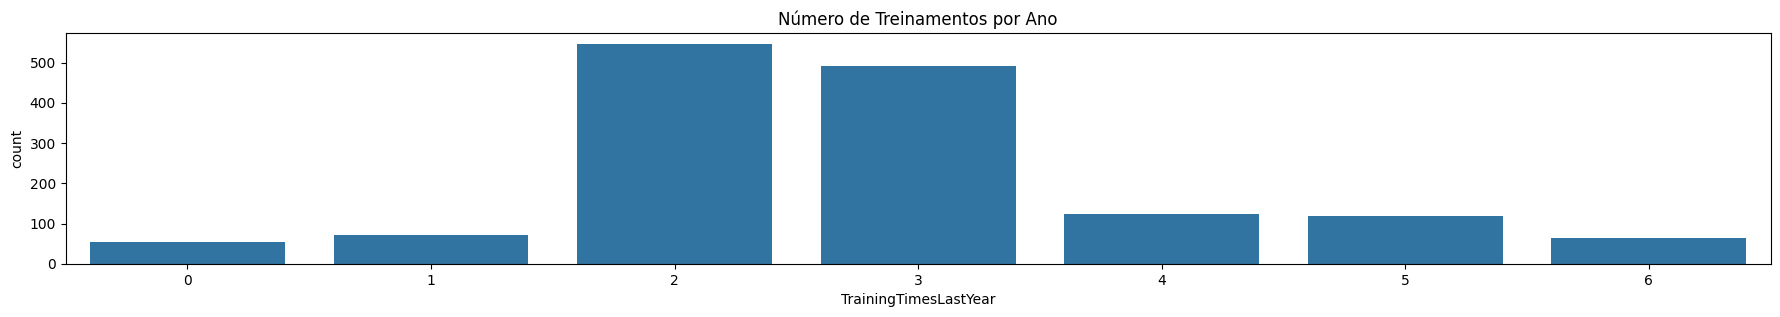

In [ ]:
# Ter uma ideia do investimento em capacitação dos funcionários.

sns.countplot(x='TrainingTimesLastYear', data=df)
plt.title('Número de Treinamentos por Ano')
plt.show()